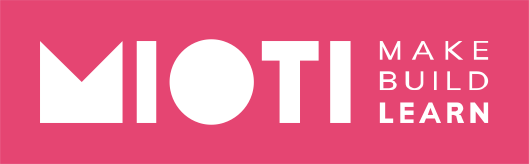
# EJERCICIOS TRABAJO EN EQUIPO
Los alumnos, por grupo, deberán entregar, una challenge, de nombre SESION 7 - TRABAJO EN EQUIPO(nombre equipo),  por cada grupo. Se usará para su resolución Python.

*Nombre Equipo*:

Miembros del equipo:
>

# Ejercicio 1 


Se pretende averiguar si el número de días de recuperación de un enfermo, después de una operación, depende del tipo de rehabilitación que siguen los enfermos. 

Para tres tipos de rehabilitación, los datos obtenidos son:

|Tipos| Días de recuperación |
|:-----|:----------------------|
|Tipo 1| 28, 27, 30, 29, 40, 41, 32, 25|
|Tipo 2| 25, 23, 19, 34, 35, 27, 40, 39, 37, 28|
|Tipo 3|  23, 19, 13, 21, 23, 29, 25|


**Suponiendo Normalidad e igualdad de varianzas en los grupos**, contrastar $(\alpha=0.05)$ si las tres formas de rehabilitación son igualmente eficaces.
Si fuesen diferentes, ¿cuáles la mejor?


In [26]:
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import nbinom


data = np.rec.array([
('Tipo1', 28),
('Tipo1', 27),
('Tipo1', 30),
('Tipo1', 29),
('Tipo1', 40),
('Tipo1', 41),
('Tipo1', 32),
('Tipo1', 25),
('Tipo2', 25),
('Tipo2', 23),
('Tipo2', 19),
('Tipo2', 34),
('Tipo2', 35),
('Tipo2', 27),
('Tipo2', 40),
('Tipo2', 39),
('Tipo2', 37),
('Tipo2', 28),
('Tipo3', 23),
('Tipo3', 19),
('Tipo3', 13),
('Tipo3', 21),
('Tipo3', 23),
('Tipo3', 29),
('Tipo3', 25)], dtype = [('Recovery','|U5'),('Score', '<i8')])

print (data)
f, p = stats.f_oneway(data[data['Recovery'] == 'Tipo1'].Score,
                      data[data['Recovery'] == 'Tipo2'].Score,
                      data[data['Recovery'] == 'Tipo3'].Score)
    
print ('              ANOVA Unidireccional                 ')
print ('==========================================================================')
 
print ('F value (El valor F calculado de la prueba):       ', f)
print ('P value (El valor p asociado de la distribución F):', p, '\n')
print ('==========================================================================')

[('Tipo1', 28) ('Tipo1', 27) ('Tipo1', 30) ('Tipo1', 29) ('Tipo1', 40)
 ('Tipo1', 41) ('Tipo1', 32) ('Tipo1', 25) ('Tipo2', 25) ('Tipo2', 23)
 ('Tipo2', 19) ('Tipo2', 34) ('Tipo2', 35) ('Tipo2', 27) ('Tipo2', 40)
 ('Tipo2', 39) ('Tipo2', 37) ('Tipo2', 28) ('Tipo3', 23) ('Tipo3', 19)
 ('Tipo3', 13) ('Tipo3', 21) ('Tipo3', 23) ('Tipo3', 29) ('Tipo3', 25)]
              ANOVA Unidireccional                 
F value (El valor F calculado de la prueba):        5.421749471025312
P value (El valor p asociado de la distribución F): 0.012181643670624171 



Dado que el valor es < que 0,05 rechazo la hipotesis nula y uso tukey para ver cual de las medias es mejor

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['Score'], data['Recovery'])
result = mc.tukeyhsd()
 
print(result)
# El mejor es el 3

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Tipo1  Tipo2     -0.8    0.9 -8.2954  6.6954  False
 Tipo1  Tipo3  -9.6429 0.0189 -17.821 -1.4647   True
 Tipo2  Tipo3  -8.8429 0.0241  -16.63 -1.0557   True
----------------------------------------------------


# Ejercicio 2
Se han realizado tests en tres poblaciones que tienen el mismo número de habitantes y la misma significación como muestra de la población total de la zona afectada.

- a. En la primera se realizaron 5 tests de los que 2 fueron positivos
- b. En la segunda se realizaron tests hasta obtener el segundo positivo, lo que ocurrió en el test numero 6
- c. En la tercera se realizaron 3 tests de los que solamente uno fue positivo.

Supuestos igualmente significativos los tres resultados se desea conocer la prevalencia más verosímil actualmente con una precisión de un decimal (un 10% de diferencia respecto al valor real) 

In [289]:
# a ) Distribucion binomial
from scipy.stats import binom
import numpy

#n = 5 
#
a = binom.pmf(2, 5, p, loc=0)

#
print(a)
#
## b ) Distribucion binomial negativa
#
b = p*binom.pmf(1, 5, p)
print(b)
#
### b ) Distribucion binomial

c = binom.pmf(1, 3, 0.4, loc=0)
##
print(c)


def calcular(p):
    a = 10*p**2*(1-p)**3
    b = 5*p**2*(1-p)**4
    c = 3*p*(1-p)**2 
    L = a * b * c
    return  float(L)

for i in range(10):
    print("Value: %s",i/10,calcular(i/10))


0.3455999999999999
0.10367999999999995
0.43199999999999994
Value: %s 0.0 0.0
Value: %s 0.1 0.0005811307335000004
Value: %s 0.2 0.006442450944000008
Value: %s 0.3 0.01470888975149999
Value: %s 0.4 0.015479341056000004
Value: %s 0.5 0.0091552734375
Value: %s 0.6 0.0030576476160000007
Value: %s 0.7 0.0004962182715000005
Value: %s 0.8 2.516582399999996e-05
Value: %s 0.9 8.857349999999985e-08
